## Observations and Insights 

#### First
Beyond the box plot of "Final Tumour Volume (mm3) by Different Treament", the Capomulin and Ramicane are the ___best___ treament regimen at this reserach. They make the mouse's tumour volume smaller than other else.

#### Second
According the line chart of "Tumour Volume of Mouse Treated with Capomulinn", with following the time point progressing, Capomulin can ___reduce___ the tumour volume markedly.

#### Third
Observating "Mouse Weight And Average Tumour Volume Correlation and Regression of Capomulin", We can get an inference that mouse weight and average tumour volume has ___high correlation___.

In [227]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_df=pd.merge(mouse_metadata, study_results, on='Mouse ID',how='outer')
# Display the data table for preview
comb_df.head


<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumour Volume (mm3)  Metastatic Sites  
0               45.000000                 0  
1               38.825898

In [2]:
# Checking the number of mice.
print(len(comb_df['Mouse ID'].unique()))


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df=comb_df[comb_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_mouselist=duplicated_df['Mouse ID'].unique()
dup_mouselist

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for mouse in dup_mouselist:
    clean_comb_df=comb_df.drop(comb_df[comb_df['Mouse ID']==mouse].index)

In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_comb_df['Mouse ID'].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
groupby_comb=clean_comb_df.groupby('Drug Regimen')
mean_list=groupby_comb['Tumour Volume (mm3)'].mean()
median_list=groupby_comb['Tumour Volume (mm3)'].median()
variance_list=groupby_comb['Tumour Volume (mm3)'].var()
std_list=groupby_comb['Tumour Volume (mm3)'].std()
sem_list=groupby_comb['Tumour Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary1_df=pd.DataFrame({'Mean':mean_list,'Median':median_list,'Variance':variance_list,'Stand Deviation':std_list,'SEM':sem_list})
summary1_df

,Mean,Median,Variance,Stand Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary2_df=clean_comb_df.groupby('Drug Regimen').agg({'Tumour Volume (mm3)':['mean','median','var','std','sem']})
summary2_df

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

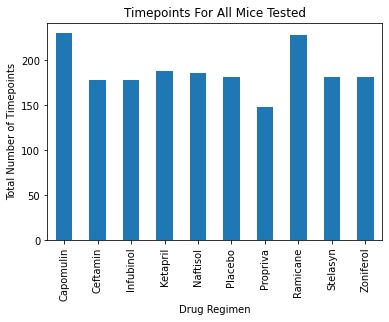

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
groupby_comb=clean_comb_df.groupby('Drug Regimen')
count_timepoints=groupby_comb['Drug Regimen'].count()
count_timepoints.plot.bar(title='Timepoints For All Mice Tested',xlabel='Drug Regimen',ylabel='Total Number of Timepoints')
plt.show()

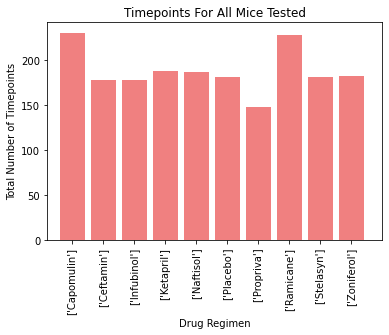

In [248]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_list_temp=list(groupby_comb['Drug Regimen'].unique())

drug_list=[''.join(string) for string in drug_list_temp]

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import numpy as np
drug_list=list(groupby_comb['Drug Regimen'].unique())

count_timepoints=groupby_comb['Drug Regimen'].count()

x_axis=np.arange(len(drug_list))
tick_locations=[value+0 for value in x_axis]

plt.xlim(-0.8,len(drug_list))
plt.xticks(tick_locations,labels=drug_list,rotation=90)
plt.bar(x_axis, count_timepoints,color='lightcoral')

plt.title('Timepoints For All Mice Tested')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')

plt.show() 

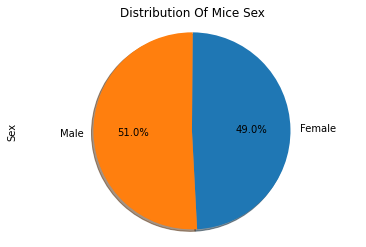

<Figure size 432x288 with 0 Axes>

In [257]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_sex=clean_comb_df.groupby('Sex')
count_sex=groupby_sex['Sex'].count()
count_sex.plot.pie(title='Distribution Of Mice Sex',shadow=True, autopct='%1.1f%%',startangle=273)
plt.axis("equal")
plt.show()
plt.tight_layout()

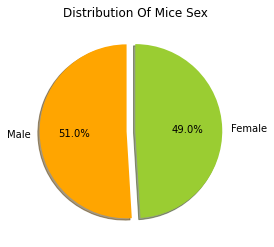

<Figure size 432x288 with 0 Axes>

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_male=clean_comb_df['Mouse ID'].loc[clean_comb_df['Sex']=='Male'].count()
count_female=clean_comb_df['Mouse ID'].loc[clean_comb_df['Sex']=='Female'].count()
sex_count=[count_male,count_female]
sex=['Male','Female']

colours = ["orange","yellowgreen"]
explode = (0.1,0)

plt.pie(sex_count,explode=explode,colors=colours,shadow=True,labels=sex,autopct="%1.1f%%",startangle=90)
plt.title('Distribution Of Mice Sex')
plt.show()
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [226]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
groupby_mice=clean_comb_df.groupby('Mouse ID')
max_timepoint_list=groupby_mice['Timepoint'].max()
max_timepoint_list

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
merge_df=pd.merge(max_timepoint_list,clean_comb_df,on=['Mouse ID','Timepoint'],how='left')
merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [225]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)
tumour_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treament in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumour volumes
    tumour_vol=merge_df['Tumour Volume (mm3)'].loc[merge_df['Drug Regimen'] == treament]
    # add subset
    quartiles = tumour_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    tumour_vol_list.append(tumour_vol)

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers=[x for x in tumour_vol if x < lower_bound]
    if len(outliers) != 0 :
        print(f'Outliers tumour volume for {treament} regimen is: {list(outliers)}')

Outliers tumour volume for Infubinol regimen is: [36.3213458]


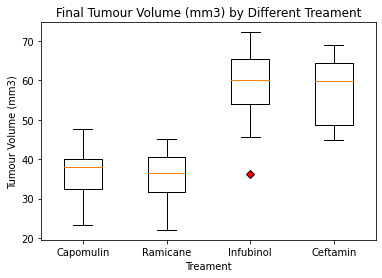

In [120]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumour Volume (mm3) by Different Treament')
ax1.set_xlabel('Treament')
ax1.set_ylabel('Tumour Volume (mm3)')

# Highlight any potential outliers in the plot by changing their colour to red and style to diamond.
red_diamond = dict(markerfacecolor='red', marker='D')
ax1.boxplot(tumour_vol_list, labels=treatment_list, flierprops=red_diamond)
plt.show()

## Line and Scatter Plots

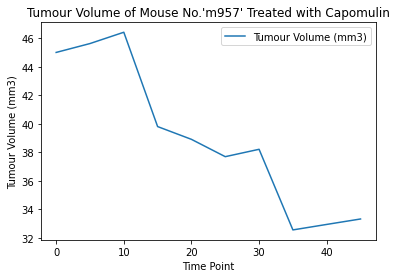

In [258]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin_df=clean_comb_df.loc[clean_comb_df['Drug Regimen']=='Capomulin']

# Random choose a mouse by sample()
random_mice_list=list(capomulin_df['Mouse ID'].sample(1))
random_mice=random_mice_list[0]

mice_df=clean_comb_df.loc[clean_comb_df['Mouse ID']==random_mice]

mice_df.plot(x='Timepoint',y='Tumour Volume (mm3)')
plt.title(f'Tumour Volume of Mouse No.\'{random_mice}\' Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumour Volume (mm3)')
plt.show()

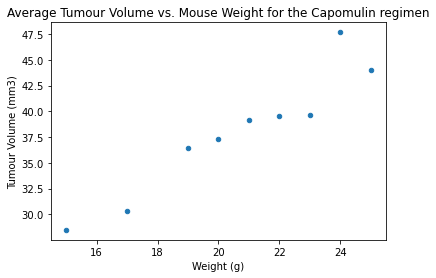

In [217]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
tumour_vol_df=merge_df[['Weight (g)','Tumour Volume (mm3)']].loc[merge_df['Drug Regimen'] == 'Capomulin']
groupby_tumour_vol=tumour_vol_df.groupby('Weight (g)').mean()
groupby_tumour_vol.reset_index(inplace=True)
groupby_tumour_vol.plot.scatter(x='Weight (g)',y='Tumour Volume (mm3)')

plt.title('Average Tumour Volume vs. Mouse Weight for the Capomulin regimen')
plt.show()

## Correlation and Regression

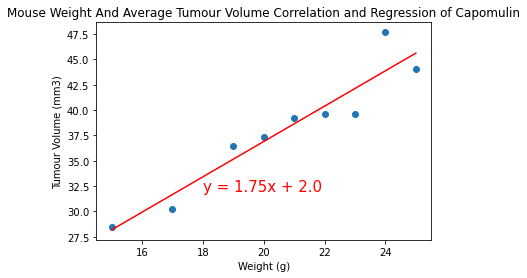

In [260]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
from scipy.stats import linregress

x_values = groupby_tumour_vol['Weight (g)']
y_values = groupby_tumour_vol['Tumour Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,32),fontsize=15,color="red")
plt.title('Mouse Weight And Average Tumour Volume Correlation and Regression of Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')
plt.show()